# Using the statistics module in PyPSA

The `statistics` module is used to easily extract information from your networks. This is useful when inspecting your solved networks and creating first visualizations of your results.

With the `statistics` module, you can look at different metrics of your network. A list of the implemented metrics are:
    
- Capital expenditure
- Operational expenditure
- Installed capacities
- Optimal capacities
- Supply
- Withdrawal
- Curtailment
- Capacity Factor
- Revenue
- Market value
- Energy balance

Now lets look at an example.

In [1]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt

First, we open an example network we want to investigate.

In [2]:
n = pypsa.examples.scigrid_de()

INFO:pypsa.io:Imported network scigrid-de.nc has buses, generators, lines, loads, storage_units, transformers


Lets run an overview of all statistics by calling:

In [3]:
n.statistics()

Capacity Factor  Capital Expenditure  Curtailment  \
            carrier                                                            
Generator   Brown Coal                 NaN                  0.0          0.0   
            Gas                        NaN                  0.0          0.0   
            Geothermal                 NaN                  0.0          0.0   
            Hard Coal                  NaN                  0.0          0.0   
            Multiple                   NaN                  0.0          0.0   
            Nuclear                    NaN                  0.0          0.0   
            Oil                        NaN                  0.0          0.0   
            Other                      NaN                  0.0          0.0   
            Run of River               NaN                  0.0          0.0   
            Solar                      NaN                  0.0          0.0   
            Storage Hydro              NaN                  0.0          0.0   
            Waste                      NaN                  0.0          0.0   
            Wind Offshore              NaN                  0.0          0.0   
            Wind Onshore               NaN                  0.0          0.0   
Line        -                          NaN                  0.0          NaN   
Load        -                          NaN                  NaN          NaN   
StorageUnit Pumped Hydro               NaN                  0.0          0.0   
Transformer -                          NaN                  0.0          NaN   

                           Dispatch  Installed Capacity  Market Value  \
            carrier                                                     
Generator   Brown Coal          0.0        20879.500000           NaN   
            Gas                 0.0        23913.130000           NaN   
            Geothermal          0.0           31.700000           NaN   
            Hard Coal           0.0        25312.600000           NaN   
            Multiple            0.0          152.700000           NaN   
            Nuclear             0.0        12068.000000           NaN   
            Oil                 0.0         2710.200000           NaN   
            Other               0.0         3027.800000           NaN   
            Run of River        0.0         3999.100000           NaN   
            Solar               0.0        37041.524779           NaN   
            Storage Hydro       0.0         1445.000000           NaN   
            Waste               0.0         1645.900000           NaN   
            Wind Offshore       0.0         2973.500000           NaN   
            Wind Onshore        0.0        37339.895329           NaN   
Line        -                   NaN       961101.136714           NaN   
Load        -                   0.0                 NaN           NaN   
StorageUnit Pumped Hydro        0.0         9179.500000           NaN   
Transformer -                   NaN       192000.000000           NaN   

                           Operational Expenditure  Optimal Capacity  Revenue  \
            carrier                                                             
Generator   Brown Coal                         0.0               0.0      0.0   
            Gas                                0.0               0.0      0.0   
            Geothermal                         0.0               0.0      0.0   
            Hard Coal                          0.0               0.0      0.0   
            Multiple                           0.0               0.0      0.0   
            Nuclear                            0.0               0.0      0.0   
            Oil                                0.0               0.0      0.0   
            Other                              0.0               0.0      0.0   
            Run of River                       0.0               0.0      0.0   
            Solar                              0.0               0.0      

So far the `statistics` are not so interesting, because we have not solved the network yet. We can only see that the network already has some installed capacities for different components.

You can see that `statistics` returns a `pandas.DataFrame`. The MultiIndex of the `DataFrame` provides the name of the network component (i.e. first entry of the MultiIndex, like *Generator, Line,...*) on the first index level. The `carrier` index level provides the carrier name of the given component. For example, in `n.generators`, we have the carriers *Brown Coal, Gas* and so on.

Now lets solve the network.

In [4]:
n.optimize()

Index(['2', '5', '10', '12', '13', '15', '18', '20', '22', '24', '26', '30',
       '32', '37', '42', '46', '52', '56', '61', '68', '69', '74', '78', '86',
       '87', '94', '95', '96', '99', '100', '104', '105', '106', '107', '117',
       '120', '123', '124', '125', '128', '129', '138', '143', '156', '157',
       '159', '160', '165', '184', '191', '195', '201', '220', '231', '232',
       '233', '236', '247', '248', '250', '251', '252', '261', '263', '264',
       '267', '272', '279', '281', '282', '292', '303', '307', '308', '312',
       '315', '317', '322', '332', '334', '336', '338', '351', '353', '360',
       '362', '382', '384', '385', '391', '403', '404', '413', '421', '450',
       '458'],
      dtype='object', name='Transformer')


Index(['2', '5', '10', '12', '13', '15', '18', '20', '22', '24', '26', '30',
       '32', '37', '42', '46', '52', '56', '61', '68', '69', '74', '78', '86',
       '87', '94', '95', '96', '99', '100', '104', '105', '106', '107', '117',
       '120', '123', '124', '125', '128', '129', '138', '143', '156', '157',
       '159', '160', '165', '184', '191', '195', '201', '220', '231', '232',
       '233', '236', '247', '248', '250', '251', '252', '261', '263', '264',
       '267', '272', '279', '281', '282', '292', '303', '307', '308', '312',
       '315', '317', '322', '332', '334', '336', '338', '351', '353', '360',
       '362', '382', '384', '385', '391', '403', '404', '413', '421', '450',
       '458'],
      dtype='object', name='Transformer')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 7/7 [00:00<00:00, 94.57it/s]
INFO:linopy.io: Writing time: 0.65s


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp /tmp/linopy-problem-9n0089cd.lp --output /tmp/linopy-solve-4af329xo.sol
Reading problem data from '/tmp/linopy-problem-9n0089cd.lp'...
142968 rows, 59640 columns, 267946 non-zeros
767984 lines were read
GLPK Simplex Optimizer 5.0
142968 rows, 59640 columns, 267946 non-zeros
Preprocessing...
22930 rows, 38242 columns, 126510 non-zeros
Scaling...
 A: min|aij| =  1.485e-02  max|aij| =  1.974e+02  ratio =  1.329e+04
GM: min|aij| =  1.913e-01  max|aij| =  5.228e+00  ratio =  2.733e+01
EQ: min|aij| =  3.688e-02  max|aij| =  1.000e+00  ratio =  2.712e+01
Constructing initial basis...
Size of triangular part is 22357
      0: obj =  -5.559232370e+08 inf =   3.048e+08 (17244)
   9011: obj =   2.257767326e+07 inf =   6.847e+07 (11709) 64
  16142: obj =   2.525822401e+07 inf =   3.733e+07 (8409) 50
  22602: obj =   3.173602183e+07 inf =   2.322e+07 (6000) 42
  28231: obj =   3.490695618e+07 inf =   1.464e+07 (4453) 3

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 59640 primals, 142968 duals
Objective: 6.68e+06
Solver model: not available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Transformer-fix-s-lower, Transformer-fix-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, Kirchhoff-Voltage-Law, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

Now we can look at the `statistics` of the solved network.

In [5]:
n.statistics()

Capacity Factor  Capital Expenditure   Curtailment  \
            carrier                                                             
Generator   Brown Coal            0.571594                  0.0      0.000000   
            Gas                   0.001311                  0.0      0.000000   
            Geothermal            0.242902                  0.0      0.000000   
            Hard Coal             0.100441                  0.0      0.000000   
            Multiple              0.000000                  0.0      0.000000   
            Nuclear               0.689185                  0.0      0.000000   
            Oil                   0.000000                  0.0      0.000000   
            Other                 0.011299                  0.0      0.000000   
            Run of River          0.898201                  0.0      0.000000   
            Solar                 0.049851                  0.0   3074.040071   
            Storage Hydro         0.732504                  0.0      0.000000   
            Waste                 0.832723                  0.0      0.000000   
            Wind Offshore         0.683922                  0.0  20666.239879   
            Wind Onshore          0.477803                  0.0  45253.373502   
Line        AC                    0.217716                  0.0           NaN   
Load        -                          NaN                  NaN           NaN   
StorageUnit Pumped Hydro          0.315689                  0.0      0.000000   
Transformer -                     0.138676                  0.0           NaN   

                               Dispatch  Installed Capacity  Market Value  \
            carrier                                                         
Generator   Brown Coal     2.864303e+05        20879.500000     14.151950   
            Gas            7.521553e+02        23913.130000     50.000000   
            Geothermal     1.848000e+02           31.700000     32.027850   
            Hard Coal      6.101796e+04        25312.600000     25.586093   
            Multiple       0.000000e+00          152.700000           NaN   
            Nuclear        1.996099e+05        12068.000000     16.395014   
            Oil            0.000000e+00         2710.200000           NaN   
            Other          8.210863e+02         3027.800000     34.036685   
            Run of River   8.620791e+04         3999.100000     19.939281   
            Solar          4.431702e+04        37041.524779     12.971777   
            Storage Hydro  2.540323e+04         1445.000000     16.686020   
            Waste          3.289390e+04         1645.900000     20.119886   
            Wind Offshore  4.880742e+04         2973.500000      3.588774   
            Wind Onshore   4.281871e+05        37339.895329      8.402191   
Line        AC             3.654453e+04       961101.136714    156.368377   
Load        -             -1.209952e+06                 NaN    -18.516102   
StorageUnit Pumped Hydro  -4.681107e+03         9179.500000    -39.377088   
Transformer -             -8.146836e+04       192000.000000     -4.831932   

                           Operational Expenditure  Optimal Capacity  \
            carrier                                                    
Generator   Brown Coal                2.864303e+06      20879.500000   
            Gas                       3.760777e+04      23913.130000   
            Geothermal                4.804800e+03         31.700000   
            Hard Coal                 1.525449e+06      25312.600000   
            Multiple                  0.000000e+00        152.700000   
            Nuclear                   1.596879e+06      12068.000000   
            Oil                       0.000000e+00       2710.200000   
            Other                     2.627476e+04       3027.800000   
            Run of River              2.586237e+05       3999.100000   
            Solar                     0.000000e+00      37041.524779   
 

As you can see there is now much more information available. There are still no capital expenditures in the network, because we only performed an operational optimization with this example network.

If you are interested in a specific metric, e.g. curtailment, you can run

In [6]:
curtailment = n.statistics.curtailment()
curtailment

             carrier      
Generator    Brown Coal           0.000000
             Gas                  0.000000
             Geothermal           0.000000
             Hard Coal            0.000000
             Multiple             0.000000
             Nuclear              0.000000
             Oil                  0.000000
             Other                0.000000
             Run of River         0.000000
             Solar             3074.040071
             Storage Hydro        0.000000
             Waste                0.000000
             Wind Offshore    20666.239879
             Wind Onshore     45253.373502
StorageUnit  Pumped Hydro         0.000000
dtype: float64

Note that when calling a specific metric the `statistics` module returns a `pandas.Series`.
To find the unit of the data returned by `statistics`, you can call `attrs` on the `DataFrame` or `Series`.

In [7]:
curtailment.attrs

{'name': 'Curtailment', 'unit': 'MWh'}

So the unit of curtailment is given in `MWh`. You can also customize your request.

For this you have various options:
1. You can select the component from which you want to get the metric with the attribute `comps`. Careful, `comps` has to be a list of strings.

In [8]:
n.statistics.curtailment(comps=["Generator"])

           carrier      
Generator  Brown Coal           0.000000
           Gas                  0.000000
           Geothermal           0.000000
           Hard Coal            0.000000
           Multiple             0.000000
           Nuclear              0.000000
           Oil                  0.000000
           Other                0.000000
           Run of River         0.000000
           Solar             3074.040071
           Storage Hydro        0.000000
           Waste                0.000000
           Wind Offshore    20666.239879
           Wind Onshore     45253.373502
Name: generators, dtype: float64

2. For metrics which have a time dimension, you can choose the aggregation method or decide to not aggregate them at all. Just use the `aggregate_time` attribute to specify what you want to do.

For example calculate the mean curtailment per time step is

In [9]:
n.statistics.curtailment(comps=["Generator"], aggregate_time="mean")

           carrier      
Generator  Brown Coal          0.000000
           Gas                 0.000000
           Geothermal          0.000000
           Hard Coal           0.000000
           Multiple            0.000000
           Nuclear             0.000000
           Oil                 0.000000
           Other               0.000000
           Run of River        0.000000
           Solar             128.085003
           Storage Hydro       0.000000
           Waste               0.000000
           Wind Offshore     861.093328
           Wind Onshore     1885.557229
dtype: float64

Or retrieve the curtailment time series by not aggregating the time series. 

In [10]:
n.statistics.curtailment(comps=["Generator"], aggregate_time=False)

snapshot                 2011-01-01 00:00:00  2011-01-01 01:00:00  \
          carrier                                                   
Generator Brown Coal                0.000000             0.000000   
          Gas                       0.000000             0.000000   
          Geothermal                0.000000             0.000000   
          Hard Coal                 0.000000             0.000000   
          Multiple                  0.000000             0.000000   
          Nuclear                   0.000000             0.000000   
          Oil                       0.000000             0.000000   
          Other                     0.000000             0.000000   
          Run of River              0.000000             0.000000   
          Solar                     0.000000             0.000000   
          Storage Hydro             0.000000             0.000000   
          Waste                     0.000000             0.000000   
          Wind Offshore           680.782819          1932.843609   
          Wind Onshore           2495.055375          3038.375977   

snapshot                 2011-01-01 02:00:00  2011-01-01 03:00:00  \
          carrier                                                   
Generator Brown Coal                0.000000             0.000000   
          Gas                       0.000000             0.000000   
          Geothermal                0.000000             0.000000   
          Hard Coal                 0.000000             0.000000   
          Multiple                  0.000000             0.000000   
          Nuclear                   0.000000             0.000000   
          Oil                       0.000000             0.000000   
          Other                     0.000000             0.000000   
          Run of River              0.000000             0.000000   
          Solar                     0.000000             0.000000   
          Storage Hydro             0.000000             0.000000   
          Waste                     0.000000             0.000000   
          Wind Offshore          1726.933806          1935.183506   
          Wind Onshore           4042.254138          4183.850463   

snapshot                 2011-01-01 04:00:00  2011-01-01 05:00:00  \
          carrier                                                   
Generator Brown Coal                0.000000             0.000000   
          Gas                       0.000000             0.000000   
          Geothermal                0.000000             0.000000   
          Hard Coal                 0.000000             0.000000   
          Multiple                  0.000000             0.000000   
          Nuclear                   0.000000             0.000000   
          Oil                       0.000000             0.000000   
          Other                     0.000000             0.000000   
          Run of River              0.000000             0.000000   
          Solar                     0.000000             0.000000   
          Storage Hydro             0.000000             0.000000   
          Waste                     0.000000             0.000000   
          Wind Offshore          1936.085491          2000.366929   
          Wind Onshore           4387.507158          4215.666659   

snapshot                 2011-01-01 06:00:00  2011-01-01 07:00:00  \
          carrier                                                   
Generator Brown Coal                0.000000             0.000000   
          Gas                       0.000000             0.000000   
          Geothermal                0.000000             0.000000   
          Hard Coal                 0.000000             0.000000   
          Multiple                  0.000000             0.000000   
          Nuclear                   0.000000             0.000000   
          Oil                       0.000000             0.000000   
          Other                     0.000000             0.00000

3. You can choose how you want to group the components of the network and how to aggregate the groups. By default the components are grouped by their carriers and summed. However, you can change this by providing different `groupby` and `aggregate_groups` attributes.

In [11]:
n.statistics.curtailment(comps=["Generator"], groupby=["bus"], aggregate_groups="max")

           bus      
Generator  1            1528.645250
           100_220kV       0.000113
           101             0.003042
           102             0.003009
           103             0.000001
                           ...     
           95_220kV        0.000357
           96_220kV        0.000105
           97              0.000079
           98              0.000380
           99_220kV        0.000011
Name: generators, Length: 489, dtype: float64

Now you obtained the maximal curtailment during one time step for every bus in the network.

Often it is better when inspecting your network to visualize the tables. Therefore, you can easily make plots to analyze your results. For example the generation/supply of the generators.

<Axes: title={'center': 'Generator in GWh'}, xlabel='None,carrier'>

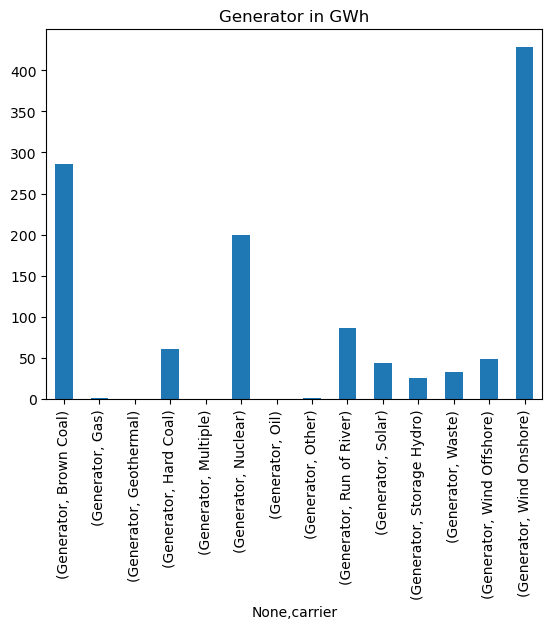

In [12]:
n.statistics.supply(comps=["Generator"]).div(1e3).plot.bar(title="Generator in GWh")

Or you could plot the generation time series of the generators.

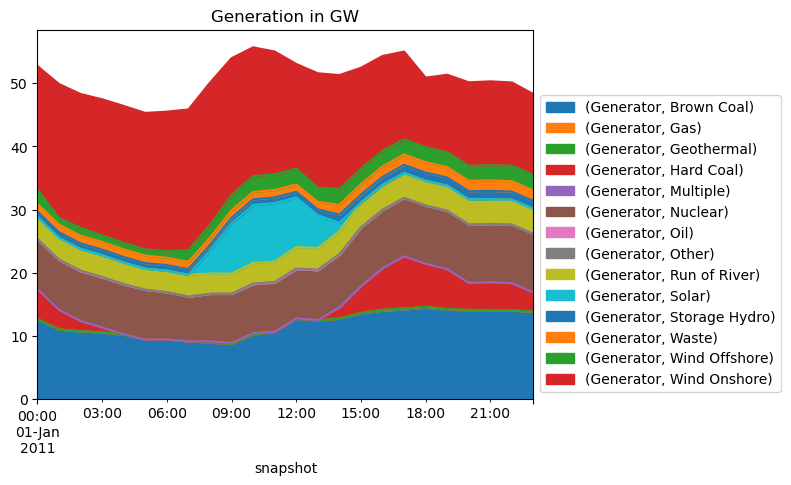

In [13]:
fig, ax = plt.subplots()
n.statistics.supply(comps=["Generator"], aggregate_time=False).div(1e3).T.plot.area(title="Generation in GW", ax=ax, legend=False)
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)

Finally, we want to look at the energy balance of the network. The energy balance is not included in the overview of the statistics module.To calculate the energy balance, you can do

In [14]:
n.statistics.energy_balance()

             carrier        bus_carrier
Generator    Brown Coal     AC             2.864303e+05
             Gas            AC             7.521553e+02
             Geothermal     AC             1.848000e+02
             Hard Coal      AC             6.101796e+04
             Multiple       AC             0.000000e+00
             Nuclear        AC             1.996099e+05
             Oil            AC             0.000000e+00
             Other          AC             8.210863e+02
             Run of River   AC             8.620791e+04
             Solar          AC             4.431702e+04
             Storage Hydro  AC             2.540323e+04
             Waste          AC             3.289390e+04
             Wind Offshore  AC             4.880742e+04
             Wind Onshore   AC             4.281871e+05
Transformer  -              AC            -4.547474e-13
Line         AC             AC            -4.547474e-12
Load         -              AC            -1.209952e+06
StorageU

Note that there is now an additional index level called bus carrier. This is because an energy balance is defined for every bus carrier. The bus carriers you have in your network you can find by looking at `n.buses.carrier.unique()`. For this network, there is only one bus carrier which is AC. AC corresponds to electricity in the regarded network. However, you can have further bus carriers for example when you have a sector coupled network. You could for example have heat or CO $_2$ as carrier. Therefore, for many `statistics` functions you have to be careful about the units of the values and it is not always given by the `attr` object of the `DataFrame` or `Series`.